<a href="https://colab.research.google.com/github/arofenitra/High-Performance-Python-Lab/blob/main/as/Task4_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import time

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft', 'fftfreq']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'signal, arb.units')

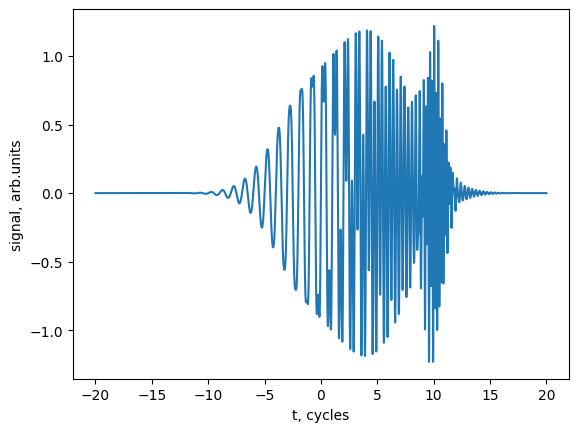

In [5]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

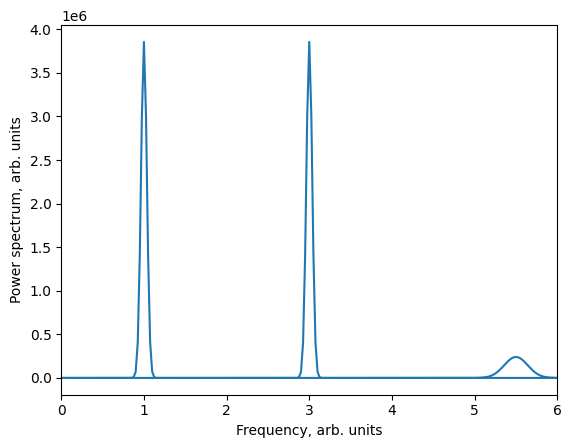

In [8]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

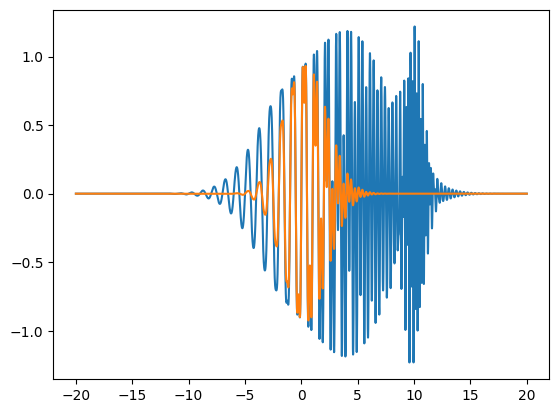

In [9]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plot(t/2/pi, y)
plot(t/2/pi, y_window)

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [11]:
# Windowed Fourier transform (Gabor transform, spectrogram)
def get_specgram(t, y, nwindowsteps=1000, window_width=2.0 * 2 * np.pi):
    specgram = []
    window_positions = np.linspace(t.min(), t.max(), nwindowsteps)
    for window_position in window_positions:
        window_function = np.exp(-(t - window_position)**2 / 2 / window_width**2)
        y_window = y * window_function
        sp_window = fft.fft(y_window)
        w_window = fft.fftfreq(len(y_window), d=(t[1] - t[0]) / 2 / np.pi)
        specgram.append(np.abs(sp_window)**2)
    return np.array(specgram), window_positions / 2 / np.pi, w_window

# Calculate the spectrogram
specgram, window_positions, frequencies = get_specgram(t, y)

4 waves packets

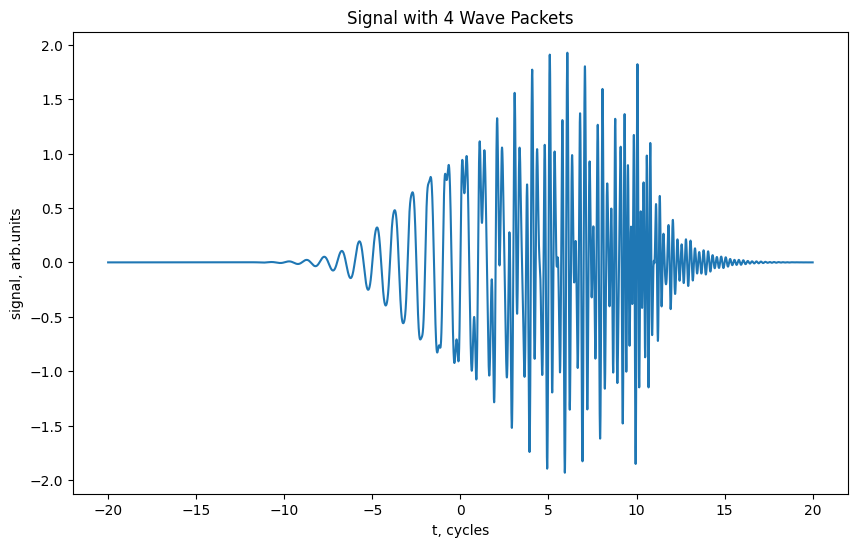

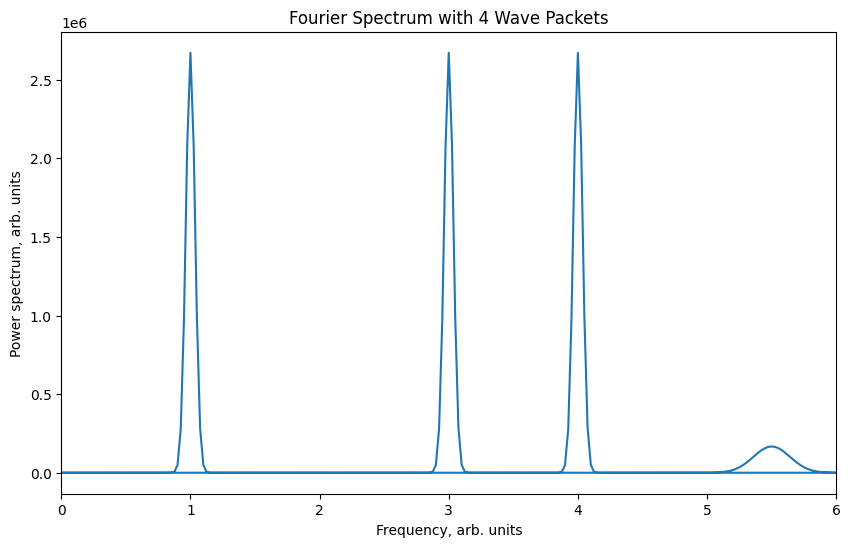

In [19]:
# Generate the signal
nofts = 1000
t = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2**14 + 5)
y = np.sin(t) * np.exp(-t**2 / 2 / 20**2)
y += np.sin(3 * t) * np.exp(-(t - 5 * 2 * np.pi)**2 / 2 / 20**2)
y += np.sin(5.5 * t) * np.exp(-(t - 10 * 2 * np.pi)**2 / 2 / 5**2)
y += np.sin(4 * t) * np.exp(-(t - 7 * 2 * np.pi)**2 / 2 / 20**2)  # Adding the 4th wave packet

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(t / 2 / np.pi, y)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.title('Signal with 4 Wave Packets')
plt.show()

# Fourier spectrum
sp = fft.fft(y)
w = fft.fftfreq(len(y), d=(t[1] - t[0]) / 2 / np.pi)
plt.figure(figsize=(10, 6))
plt.plot(w, np.abs(sp)**2)
plt.xlim(0, 6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.title('Fourier Spectrum with 4 Wave Packets')
plt.show()

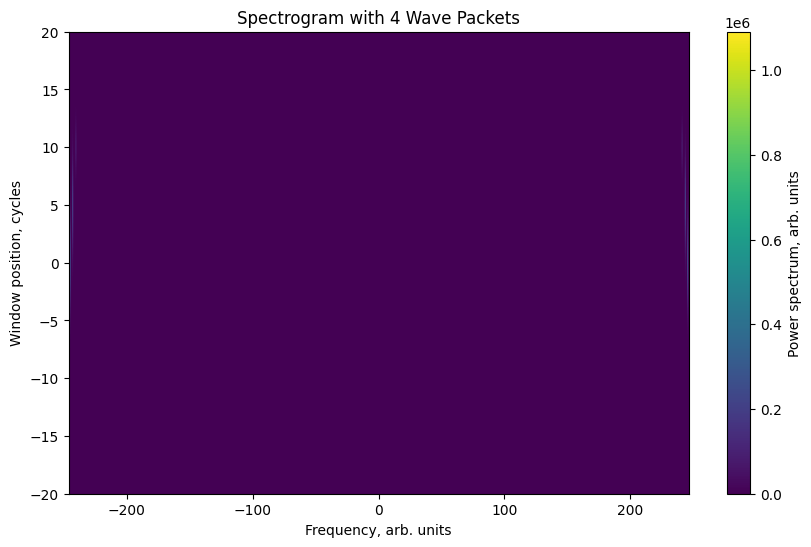

In [12]:
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(specgram, aspect='auto', extent=[frequencies.min(), frequencies.max(), window_positions.min(), window_positions.max()], origin='lower')
plt.colorbar(label='Power spectrum, arb. units')
plt.xlabel('Frequency, arb. units')
plt.ylabel('Window position, cycles')
plt.title('Spectrogram with 4 Wave Packets')
plt.show()


In [16]:
# Change the number of time steps to a power of 2 and slightly modify it
t_pow2 = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2**14)
t_pow2_modified = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2**14 + 5)

# Measure the timing
start_time = time.time()
y_pow2 = np.sin(t_pow2) * np.exp(-t_pow2**2 / 2 / 20**2)
y_pow2 += np.sin(3 * t_pow2) * np.exp(-(t_pow2 - 5 * 2 * np.pi)**2 / 2 / 20**2)
y_pow2 += np.sin(5.5 * t_pow2) * np.exp(-(t_pow2 - 10 * 2 * np.pi)**2 / 2 / 5**2)
y_pow2 += np.sin(4 * t_pow2) * np.exp(-(t_pow2 - 7 * 2 * np.pi)**2 / 2 / 20**2)
sp_pow2 = fft.fft(y_pow2)
w_pow2 = fft.fftfreq(len(y_pow2), d=(t_pow2[1] - t_pow2[0]) / 2 / np.pi)
time_pow2 = time.time() - start_time

start_time = time.time()
y_pow2_modified = np.sin(t_pow2_modified) * np.exp(-t_pow2_modified**2 / 2 / 20**2)
y_pow2_modified += np.sin(3 * t_pow2_modified) * np.exp(-(t_pow2_modified - 5 * 2 * np.pi)**2 / 2 / 20**2)
y_pow2_modified += np.sin(5.5 * t_pow2_modified) * np.exp(-(t_pow2_modified - 10 * 2 * np.pi)**2 / 2 / 5**2)
y_pow2_modified += np.sin(4 * t_pow2_modified) * np.exp(-(t_pow2_modified - 7 * 2 * np.pi)**2 / 2 / 20**2)
sp_pow2_modified = fft.fft(y_pow2_modified)
w_pow2_modified = fft.fftfreq(len(y_pow2_modified), d=(t_pow2_modified[1] - t_pow2_modified[0]) / 2 / np.pi)
time_pow2_modified = time.time() - start_time

print(f"Time for power of 2 time steps: {time_pow2} seconds")
print(f"Time for modified power of 2 time steps: {time_pow2_modified} seconds")

# Explanation
# The difference in timing can be explained by the efficiency of the FFT algorithm, which is optimized for powers of 2.
# When the number of time steps is a power of 2, the FFT algorithm can use its most efficient implementation.
# Slightly modifying the number of time steps (e.g., 2**14 + 5) can lead to less efficient computation, resulting in longer processing times.

Time for power of 2 time steps: 0.00497746467590332 seconds
Time for modified power of 2 time steps: 0.007193088531494141 seconds
